In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
import pylab 
from scipy import stats
from sklearn.covariance import EllipticEnvelope

In [40]:
food = pd.read_csv("food_cleaned.csv")
food_cleaned = pd.read_csv("food_cleaned.csv")
food_cleaned.loc[~food_cleaned["state"].isin(["California", "New York"]), "state"] = "Underdeveloped"
companies = food["company"]
date = food["date"]
food["month"] = food["month"].astype("str")
#food["year"] = food["year"].astype("str")
food["size"] = food["size"].astype("str")
food = food.drop(["Unnamed: 0", "Id", "date", "id", "company", "number", "street", "city", 'zip', 'lat', 'lon'], axis = 1)
food.loc[~food["state"].isin(["California", "New York"]), "state"] = "Underdeveloped"
food = pd.get_dummies(food)
food["company"] = companies
food["date"] = date

In [41]:
food.columns.size

42

In [42]:
#food.to_csv("food_outliers.csv", sep = ",")

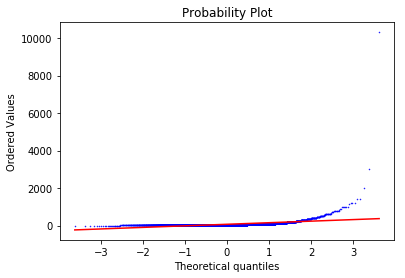

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = food["pounds"]
res = stats.probplot(x, plot = plt)
ax.get_lines()[0].set_markersize(0.5)
pylab.show()

In [46]:
food.drop(["company", "date"], axis = 1).corr()

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_applied,type_bus,type_comm,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web
pounds,1.000000,0.059328,-0.083896,0.086503,-0.023533,-0.013950,-0.005465,-0.008645,-0.007080,0.020915,...,-0.081073,-0.014687,-0.021373,-0.024116,-0.027948,0.214263,-0.050357,0.040625,-0.034367,-0.020737
state_California,0.059328,1.000000,-0.963647,-0.195425,0.040583,0.009802,-0.015701,-0.009599,-0.011177,-0.028641,...,-0.262815,0.016255,0.123263,0.057819,-0.203212,0.102774,0.100162,-0.016350,0.175920,-0.020163
state_New York,-0.083896,-0.963647,1.000000,-0.073707,-0.042792,0.000294,0.021458,-0.006180,0.004197,0.022280,...,0.284261,-0.006816,-0.111225,-0.127834,0.199096,-0.111980,-0.094800,0.017896,-0.168159,0.027624
state_Underdeveloped,0.086503,-0.195425,-0.073707,1.000000,0.005592,-0.037665,-0.020156,0.058513,0.026314,0.025123,...,-0.062430,-0.035654,-0.051827,0.253418,0.027706,0.027419,-0.025891,-0.004662,-0.039392,-0.026138
month_1,-0.023533,0.040583,-0.042792,0.005592,1.000000,-0.095161,-0.097170,-0.082434,-0.099646,-0.107326,...,-0.014041,-0.008825,-0.010512,0.042830,-0.007695,0.003131,0.011894,0.010232,0.007835,-0.012497
month_10,-0.013950,0.009802,0.000294,-0.037665,-0.095161,1.000000,-0.096913,-0.082215,-0.099382,-0.107042,...,0.003307,0.001507,0.000504,-0.047291,-0.015008,0.007866,0.012237,0.015864,0.018581,0.002715
month_11,-0.005465,-0.015701,0.021458,-0.020156,-0.097170,-0.096913,1.000000,-0.083951,-0.101480,-0.109302,...,0.004505,-0.002501,0.011874,-0.018774,-0.028675,0.006593,0.002285,0.008626,-0.003152,0.016985
month_12,-0.008645,-0.009599,-0.006180,0.058513,-0.082434,-0.082215,-0.083951,1.000000,-0.086090,-0.092726,...,-0.009079,-0.004200,0.006734,0.020180,-0.005814,0.019031,-0.010679,-0.025506,0.006601,-0.015216
month_2,-0.007080,-0.011177,0.004197,0.026314,-0.099646,-0.099382,-0.101480,-0.086090,1.000000,-0.112086,...,-0.008274,-0.014437,0.017551,0.035095,-0.020196,-0.005723,-0.004364,0.001217,-0.002794,0.009888
month_3,0.020915,-0.028641,0.022280,0.025123,-0.107326,-0.107042,-0.109302,-0.092726,-0.112086,1.000000,...,-0.014896,-0.017146,-0.003759,0.050356,-0.004623,0.003343,-0.016658,-0.000089,-0.000352,0.016420


In [29]:
food.sort_values("pounds", ascending = False)

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_comm,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date
3758,10312.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"Innovative Baking, LLC",2018-04-04
3377,3000.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,MKTG,2018-03-14
1603,2000.0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,Twitter NYC,2017-11-03
4360,1400.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Zesty SF,2018-05-09
3352,1400.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,MKTG,2018-03-13
4169,1200.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,HEM Distributor Inc,2018-04-26
3353,1200.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,MKTG,2018-03-13
4166,1200.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Growers Refrigeration,2018-04-26
4253,1134.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Zesty SF,2018-05-03
4005,1000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Zesty SF,2018-04-19


In [6]:
#identified using internal studentized residuals in R 
outliers = np.array([3312, 3631, 4006, 479, 4254, 3377, 912, 3281, 4361, 4303, 1936,
                     946, 927, 1615, 2836, 2457, 2498, 3235, 3354, 3147, 4279, 3353,
                     864, 1729, 1861, 2690, 2313, 1604, 3378, 1038, 837, 3759]) - 1
food[food.index.isin(outliers)]

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_comm,type_edu-health,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date
478,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,ZeroCater,2017-08-08
836,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,MeUndies HQ,2017-09-06
863,1.4,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Twitch,2017-09-11
911,2.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Twitch,2017-09-14
926,800.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,ZeroCater,2017-09-13
945,3.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,ZeroCater,2017-09-15
1037,0.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Scribd,2017-09-22
1603,2000.0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,Twitter NYC,2017-11-03
1614,5.0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,The Town Kitchen,2017-11-02
1728,1.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,CircleCI,2017-11-13


In [7]:
food[~food.index.isin(outliers)]["pounds"].sort_values(ascending = False)

4166    1200.0
4169    1200.0
4691    1000.0
4575    1000.0
4622    1000.0
4105    1000.0
4465    1000.0
4610     900.0
4496     900.0
1383     850.0
4445     800.0
4207     800.0
4125     800.0
4151     800.0
4723     800.0
4595     750.0
4518     700.0
4082     700.0
4381     700.0
4640     700.0
2969     669.0
3501     620.0
3596     620.0
4335     600.0
3937     600.0
774      600.0
4413     600.0
4232     600.0
4063     600.0
3372     600.0
         ...  
2948       3.0
4356       3.0
3082       3.0
2776       3.0
3104       3.0
3221       3.0
2696       3.0
2676       3.0
3281       3.0
3338       3.0
1334       3.0
2578       3.0
710        3.0
3564       3.0
791        3.0
2508       3.0
784        3.0
2480       3.0
4571       3.0
2380       2.0
1504       2.0
3004       2.0
4705       2.0
298        2.0
3073       2.0
704        2.0
2377       2.0
2337       2.0
4619       2.0
2305       1.0
Name: pounds, Length: 4721, dtype: float64

\begin{align*}
&- \text{Running t-test with bonferroni correction on internally studentized residuals in R identified 32 outliers.}\\
&- \text{Outliers mostly datapoints that have pounds that are very high and very low.} \\
&- \text{Identified some reasonable donations such as 5 or 6 pounds as outliers.}\\ 
& \text{Didn't mark some really large donations such as 1200 pounds as an outlier nor other small donations that's 1 or 2 pounds}\\
\end{align*}

## Elliptical Envelope

In [48]:
food.columns

Index(['pounds', 'state_California', 'state_New York', 'state_Underdeveloped',
       'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'size_10.0',
       'size_1000.0', 'size_10000.0', 'size_10001.0', 'size_200.0',
       'size_50.0', 'size_500.0', 'size_5000.0', 'type_applied', 'type_bus',
       'type_comm', 'type_edu-health', 'type_fin', 'type_food', 'type_other',
       'type_sale', 'type_soft', 'type_web', 'company', 'date'],
      dtype='object')

In [27]:
X = np.array(food.drop(["company", "date"], axis = 1))
outlier_frac = 0.01

In [28]:
ell = EllipticEnvelope(contamination = outlier_frac, random_state = 12687)
ell.fit(X)

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.01,
         random_state=12687, store_precision=True, support_fraction=None)

In [52]:
y = ell.predict(X)
food["ell_outliers"] = y 
food_cleaned["ell_outliers"] = y

In [60]:
food[(food["company"] == "Habit.com") & (food["ell_outliers"] == -1)].pounds

420      50.0
473      70.0
564      90.0
647      70.0
735     150.0
811     150.0
899      50.0
1000     90.0
1088    103.0
1463    175.0
1558    190.0
1661     85.0
1761    190.0
1885    140.0
1952    100.0
2056     80.0
2159    150.0
2258    210.0
2806    350.0
3151    100.0
3311    776.0
Name: pounds, dtype: float64

In [72]:
food[food["ell_outliers"] == -1].pounds

31         40.00
52         40.00
103        10.00
218        12.35
420        50.00
445        45.00
473        70.00
564        90.00
647        70.00
735       150.00
811       150.00
899        50.00
1000       90.00
1088      103.00
1383      850.00
1463      175.00
1558      190.00
1607       63.00
1614        5.00
1661       85.00
1761      190.00
1885      140.00
1952      100.00
2056       80.00
2066       35.00
2126       11.00
2159      150.00
2258      210.00
2544      100.00
2806      350.00
2868      250.00
2869      220.00
3151      100.00
3311      776.00
3377     3000.00
3495       20.00
3758    10312.00
3817        7.00
3948       10.00
3966      150.00
4073       90.00
4166     1200.00
4169     1200.00
4223      364.00
4244      329.00
4327       80.00
4456       40.00
4587       65.00
Name: pounds, dtype: float64

## Isolation Forest

In [67]:
isf = IsolationForest(random_state = 123568, contamination = outlier_frac, n_estimators = 1000)
isf.fit(X)
y = isf.predict(X)

In [68]:
food["isf_outliers"] = y
food_cleaned["isf_outliers"] = y

In [71]:
food[(food["isf_outliers"] == -1)]

,pounds,state_California,state_New York,state_Underdeveloped,month_1,month_10,month_11,month_12,month_2,month_3,...,type_fin,type_food,type_other,type_sale,type_soft,type_web,company,date,ell_outliers,isf_outliers
53,60.00,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Zillow NYC,2017-06-26,1,-1
65,33.18,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Flexport NYC,2017-06-27,1,-1
106,7.04,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,BarkBox,2017-06-30,1,-1
520,113.67,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Shutterstock,2017-08-10,1,-1
1195,50.00,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,Zillow NYC,2017-10-03,1,-1
1327,80.00,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,Shutterstock,2017-10-13,1,-1
1385,175.00,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,Shutterstock,2017-10-18,1,-1
1513,90.00,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,Airbnb,2017-10-26,1,-1
1603,2000.00,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,Twitter NYC,2017-11-03,1,-1
1617,24.00,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,Airbnb,2017-11-03,1,-1


In [76]:
food[food["isf_outliers"] == -1].pounds.quantile(0.75)

181.25

In [77]:
food[food["ell_outliers"] == -1].pounds.quantile(0.75)

195.0

In [79]:
len(food[food["isf_outliers"] == 1].company.unique())

177

In [83]:
len(food_cleaned[food_cleaned["isf_outliers"] == 1].company.unique())

177

In [35]:
food_cleaned[food_cleaned["ell_outliers"] == 1].drop(["ell_outliers", "isf_outliers"], axis = 1).to_csv("no_ell_outliers", sep = ",")

In [36]:
food_cleaned[food_cleaned["isf_outliers"] == 1].drop(["ell_outliers", "isf_outliers"], axis = 1).to_csv("no_isf_outliers", sep = ",")
food_cleaned[(food_cleaned["ell_outliers"]==1) & (food_cleaned["isf_outliers"] == 1)].drop(["ell_outliers", "isf_outliers"], axis = 1).to_csv("no_outliers", sep = ",")